# Chloe deBeus
## Task 4.9 - Data visualization
### Part One: Reading

### P1 01. Import libraries and data file
#### Importing new libraries for visualization after downloading them through the command line

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
mainPath = r'C:\Users\18286\Documents\Career Foundry\05_2023_Instacart Basket Analysis'
#make sure to use the pkl file call
customers_orders = pd.read_pickle(os.path.join(mainPath, '02 Datasets', 'Clean data', 'customers_orders_cleaned.pkl'))

### P1 02. Creating bar charts

In [23]:
customers_orders['busiest_days'].value_counts(dropna = False)

Regularly busy days    4972214
Busiest days           4617574
Least busy days        2949154
Name: busiest_days, dtype: int64

In [25]:
customers_orders.groupby('busiest_days').agg({'orders_day_of_week': 'max'})

,orders_day_of_week
busiest_days,
Busiest days,1
Least busy days,4
Regularly busy days,6


In [26]:
customers_orders['orders_day_of_week'].value_counts(dropna = False)

1    2430896
0    2186678
5    1967446
3    1731288
2    1577342
6    1427426
4    1217866
Name: orders_day_of_week, dtype: int64

In [85]:
crosstab = pd.crosstab(customers_orders['days_since_prior_order'], customers_orders['order_number'], dropna = False)

In [86]:
crosstab.to_clipboard()
#to copy and paste into excel

<Axes: >

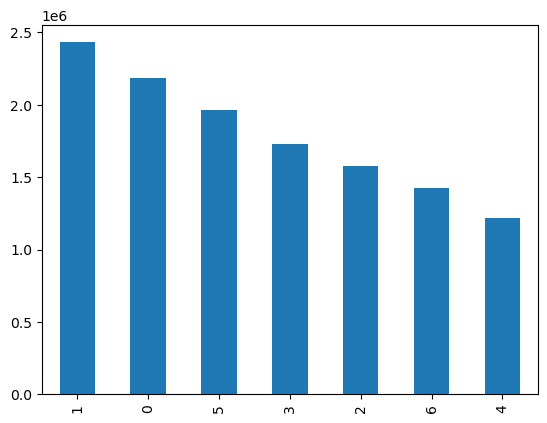

In [3]:
customers_orders['orders_day_of_week'].value_counts().plot.bar()
#lol what does this even mean, this graph isn't very well done
#i'll learn more details later

<Axes: >

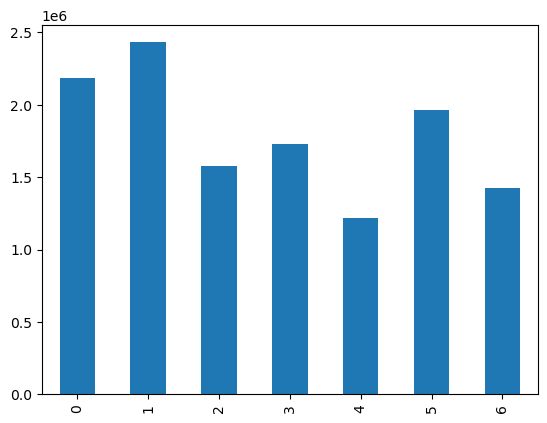

In [4]:
#let's sort the order with sort_index
customers_orders['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
#same with printing regular frequencies
customers_orders['orders_day_of_week'].value_counts().sort_index()

0    2186678
1    2430896
2    1577342
3    1731288
4    1217866
5    1967446
6    1427426
Name: orders_day_of_week, dtype: int64

<Axes: >

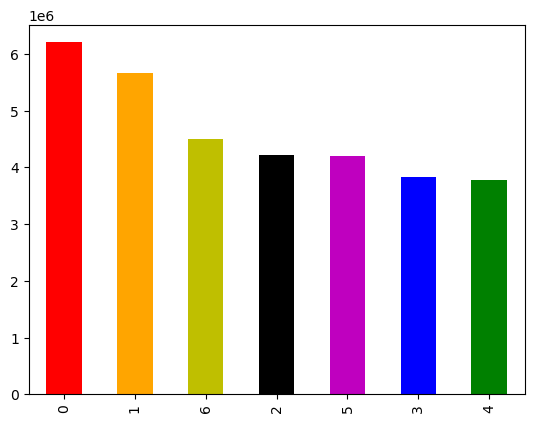

In [6]:
#let's add color to the plot
customers_orders['orders_day_of_week'].value_counts().plot.bar(color = ['r', 'orange', 'y', 'k', 'm', 'b', 'g'])

### P1 03. Exporting charts

In [13]:
#what is the units of the graph?
customers_orders['orders_day_of_week'].value_counts()

1    2430896
0    2186678
5    1967446
3    1731288
2    1577342
6    1427426
4    1217866
Name: orders_day_of_week, dtype: int64

Text(0.5, 1.0, 'Order frequency by day of week')

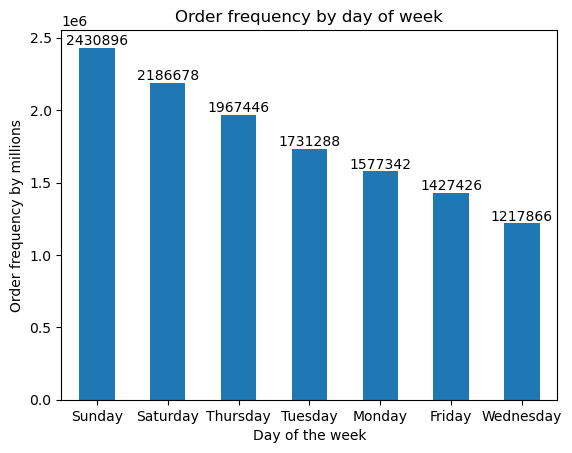

In [78]:
days_bar = customers_orders['orders_day_of_week'].value_counts().plot.bar() #(color = ['#006400', '#556B2F',  '#2E8B57', '#3CB371', '#66CDAA', '#20B2AA', '#90EE90'])
days_bar.set_xticklabels(['Sunday', 'Saturday', 'Thursday', 'Tuesday', 'Monday', 'Friday', 'Wednesday'])
for i, v in enumerate(customers_orders['orders_day_of_week'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Day of the week')
plt.ylabel('Order frequency by millions')
plt.title('Order frequency by day of week')

In [7]:
days_bar
#just calling that does nothing, or it's missing something

<Axes: >

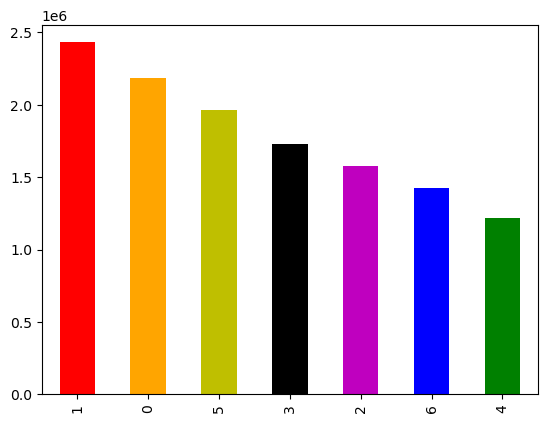

In [8]:
#so i can use this to call the figure given the object
days_bar.figure

In [79]:
#exporting into a saved file
days_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'dow_orders_bar_chart.png'))

### P1 04. Histograms and Scatterplots

<Axes: ylabel='Frequency'>

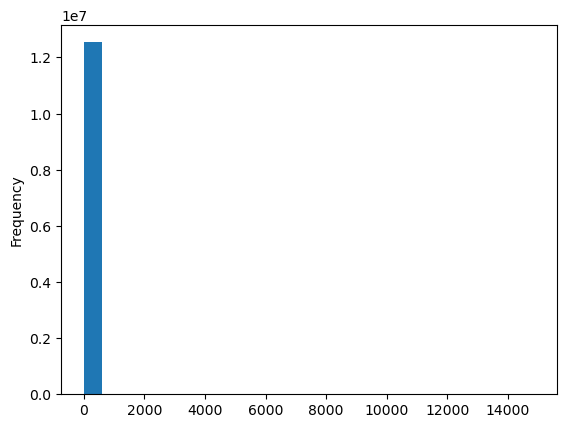

In [44]:
customers_orders['prices'].plot.hist(bins = 25)
#let's check why there aren't 25 bins

In [45]:
customers_orders['prices'].describe()
#there is an extreme value in the max, so it's reducing it to one bar
#so what about a range?

count    1.253894e+07
mean              NaN
std               NaN
min      1.000000e+00
25%      4.101562e+00
50%      7.199219e+00
75%      1.100000e+01
max      1.489600e+04
Name: prices, dtype: float64

<Axes: ylabel='Frequency'>

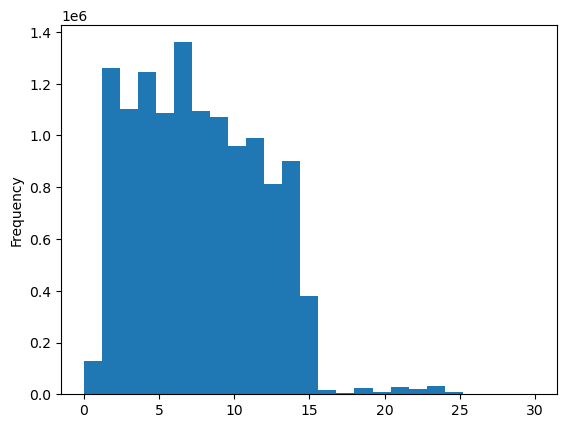

In [46]:
#so what about a range to reduce the plot?
prices_range = (0, 30)
customers_orders['prices'].plot.hist(bins = 25, range = prices_range)
#i kept testing the ranges. starting with 1000, 100, 50, 40 down to 30

<Axes: xlabel='prices', ylabel='prices'>

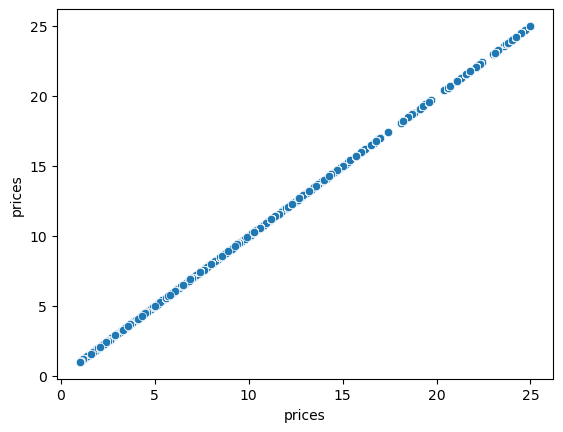

In [56]:
#this will show us the actual data points
sns.scatterplot(x = 'prices', y = 'prices', data = customers_orders)

In [4]:
#let's look further into these outliers
customers_orders.loc[customers_orders['prices'] > 100]

,user_id,first_name,surname,gender,state,age,date_joined,dependents,fam_status,income,...,busiest_days,price_category,busiest_period_of_day,max_order_count,loyalty_status,spending_mean,spending_status,order_frequency_median,frequency_status,big_merge
8594610,17,Doris,Richmond,Female,Maryland,72,1/2/2017,1,married,89519,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8594611,17,Doris,Richmond,Female,Maryland,72,1/2/2017,1,married,89519,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8594904,17,Judy,Solomon,Female,Oklahoma,26,1/3/2017,0,single,76863,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8594905,17,Judy,Solomon,Female,Oklahoma,26,1/3/2017,0,single,76863,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8595198,17,Stephen,Murillo,Male,Washington,47,1/5/2017,2,married,116683,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8830693,17,Maria,Frye,Female,Tennessee,52,4/1/2020,0,single,33954,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8830986,17,Douglas,Andrews,Male,Alabama,50,4/1/2020,0,single,108300,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8830987,17,Douglas,Andrews,Male,Alabama,50,4/1/2020,0,single,108300,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both
8831280,17,Denise,Morris,Female,Nebraska,39,4/1/2020,1,married,74564,...,Regularly busy days,High-range product,Most orders period,40,Regular customer status,108.625,High spender status,5.0,Frequent customer,both


In [5]:
customers_orders['prices'].describe()

count    1.253894e+07
mean              NaN
std               NaN
min      1.000000e+00
25%      4.101562e+00
50%      7.199219e+00
75%      1.100000e+01
max      1.489600e+04
Name: prices, dtype: float64

In [6]:
customers_orders.loc[customers_orders['prices'] > 100, 'prices'] = np.nan

In [7]:
customers_orders['prices'].describe()

count    1.253733e+07
mean              NaN
std      0.000000e+00
min      1.000000e+00
25%      4.101562e+00
50%      7.199219e+00
75%      1.100000e+01
max      2.500000e+01
Name: prices, dtype: float64

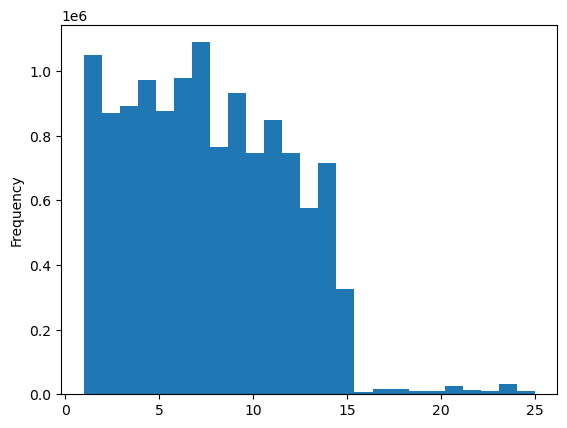

In [8]:
prices_hist_25 = customers_orders['prices'].plot.hist(bins = 25)

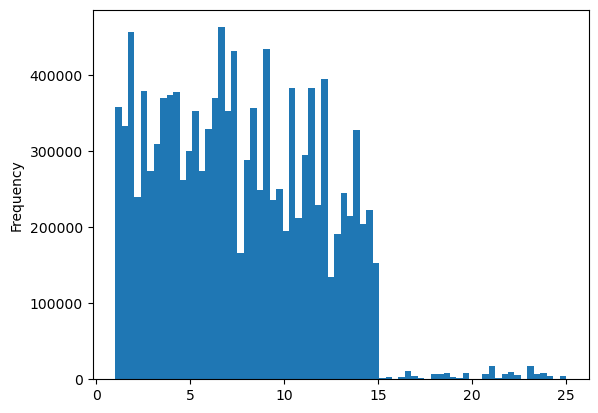

In [9]:
prices_hist_70 = customers_orders['prices'].plot.hist(bins = 70)

In [63]:
#exporting into a saved file
prices_hist_70.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'prices_hist_70.png'))
prices_hist_25.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'prices_hist_25.png'))

### P1 05. Sampling data

In [10]:
#creating a random sample in order to make a line graph
np.random.seed(4)
#this created a variable that produced a random boolean at the rate of 70/30
dev = np.random.rand(len(customers_orders)) <= 0.7

In [11]:
#receive boolean
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
#you can use 30% based on the central limit theorem
#store 70% in big sample
big_sample = customers_orders[dev]
#store 30% in small sample
small_sample = customers_orders[~dev]

In [13]:
#let's make sure the lengths are the same among sample and whole
print(len(customers_orders))
print(len(big_sample) + len(small_sample))

12538942
12538942


In [14]:
chart_dataset = small_sample[['orders_day_of_week', 'prices']]

C:\Users\18286\AppData\Local\Temp\ipykernel_9252\3376801071.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  prices_line.set_xticklabels([' ', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


Text(0.5, 1.0, 'Prices by day of week')

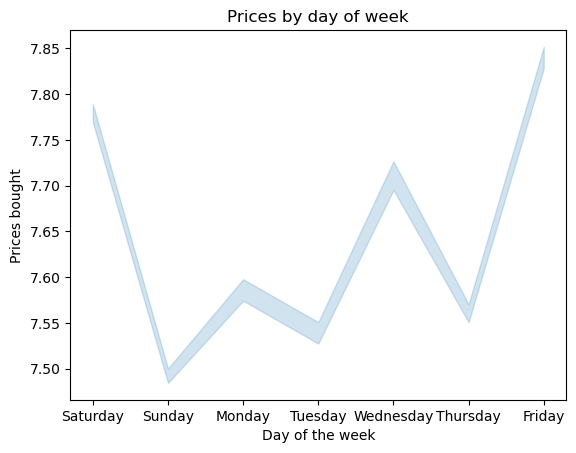

In [15]:
prices_line = sns.lineplot(data = chart_dataset, x = 'orders_day_of_week', y = 'prices')
prices_line.set_xticklabels([' ', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
#xtick_positions = list(range(len(xtick_labels)))
#for i, v in enumerate(customers_orders['orders_day_of_week'].value_counts()):
    #plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Day of the week')
plt.ylabel('Prices bought')
plt.title('Prices by day of week')

In [22]:
prices_line.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'prices_line.png'))

## Task - Part One (Reading) Complete

## Task - Part Two - Task 2
### Step 1
#### imported the proper libraries and the most recent data set under customers_orders
### Step 2
#### created a bar chart, histogram, scatterplot, and line chart above
### Step 3 - Create a histogram of hour of day sales

In [65]:
customers_orders['order_time_of_day'].value_counts()

11    1339572
10    1251718
12    1232374
13    1148550
9     1132430
14    1131624
15    1039740
16     870480
8      699608
17     679458
19     499720
18     449748
20     331266
7      220844
21     116870
22     101556
23      65286
6       57226
0       54808
5       46748
1       37076
2       24180
4        8060
Name: order_time_of_day, dtype: int64

C:\Users\18286\AppData\Local\Temp\ipykernel_10616\2837236974.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  hour_hist.set_xticklabels([' ', '12:00AM', '5:00AM', '10:00AM', '3:00PM', '8:00PM'])


Text(0.5, 1.0, 'Order frequency by time of day')

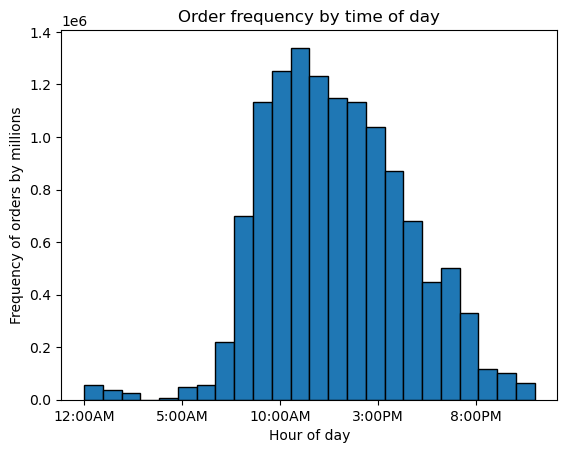

In [69]:
hour_hist = customers_orders['order_time_of_day'].plot.hist(bins = 24, edgecolor = 'black')
#add the label, so it's clear what the numbers represent
#because they aren't clear otherwise
hour_hist.set_xticklabels([' ', '12:00AM', '5:00AM', '10:00AM', '3:00PM', '8:00PM'])
plt.xlabel('Hour of day')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Frequency of orders by millions')
plt.title('Order frequency by time of day')

In [70]:
hour_hist.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'hour_of_day_hist.png'))

### Step 4 - Bar chart from loyalty status

Text(0.5, 1.0, 'Customer loyalty status')

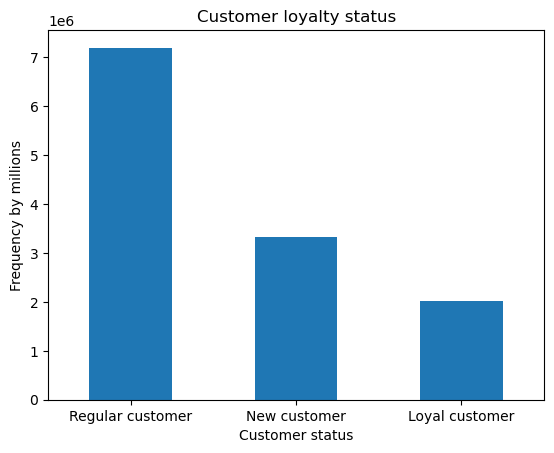

In [80]:
loyalty_bar = customers_orders['loyalty_status'].value_counts().plot.bar()
#adding a title to better understand the graph
loyalty_bar.set_ylabel('Frequency by millions')
xticks = plt.xticks()[0]
xtick_labels = ['Regular customer', 'New customer', 'Loyal customer']
plt.xticks(xticks, xtick_labels, rotation = 'horizontal')
loyalty_bar.set_xlabel('Customer status')
plt.title('Customer loyalty status')

In [81]:
loyalty_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'customer_loyalty_bar.png'))

In [36]:
#this scale seems a bit off... so let's see what the numbers are
customers_orders['loyalty_status'].value_counts()
#based on these numbers, let's add a title of the frequency to the axis

Regular customer status    7197580
New customer status        3321526
Loyal customer status      2019836
Name: loyalty_status, dtype: int64

### Step 5 - Difference in expenditure based on hour of day

In [17]:
#first, create a sample 70/30
np.random.seed(4)
#this created a variable that produced a random boolean at the rate of 70/30
dev = np.random.rand(len(customers_orders)) <= 0.7
big_sample = customers_orders[dev]
small_sample = customers_orders[~dev]

In [18]:
#test the length of these variables
print(len(customers_orders))
print(len(small_sample) + len(big_sample))

12538942
12538942


In [19]:
expenditure_data = small_sample[['prices', 'order_time_of_day']]

C:\Users\18286\AppData\Local\Temp\ipykernel_9252\247868335.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  expenditure_line.set_xticklabels([' ', '12:00AM', '5:00AM', '10:00AM', '3:00PM', '8:00PM'])


Text(0.5, 1.0, 'Prices by time of day')

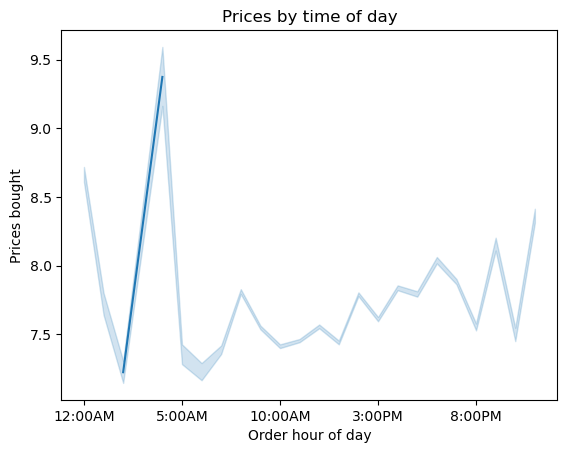

In [20]:
expenditure_line = sns.lineplot(data = expenditure_data, x = 'order_time_of_day', y = 'prices')
expenditure_line.set_xticklabels([' ', '12:00AM', '5:00AM', '10:00AM', '3:00PM', '8:00PM'])
plt.xlabel('Order hour of day')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Prices bought')
plt.title('Prices by time of day')

In [75]:
expenditure_line.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'customer_expenditure_line.png'))

### Step 6 - Exploratory analysis of customers

In [41]:
#connection between age and family
#let's remind ourselves of the variable names
customers_orders.dtypes

user_id                       int8
first_name                  object
surname                     object
gender                      object
state                       object
age                           int8
date_joined                 object
dependents                    int8
fam_status                  object
income                       int32
order_id                     int32
order_number                  int8
orders_day_of_week            int8
order_time_of_day             int8
days_since_prior_order        int8
new_customer                 int32
product_id                   int32
add_to_cart_order            int32
reordered                    int32
_merge                    category
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float16
busiest_days                object
price_category              object
busiest_period_of_day       object
max_order_count               int8
loyalty_status      

In [46]:
#our sample information was created above with big_sample and small_sample
#so let's start with the data
customer_age_and_family_data = small_sample[['age', 'dependents']]

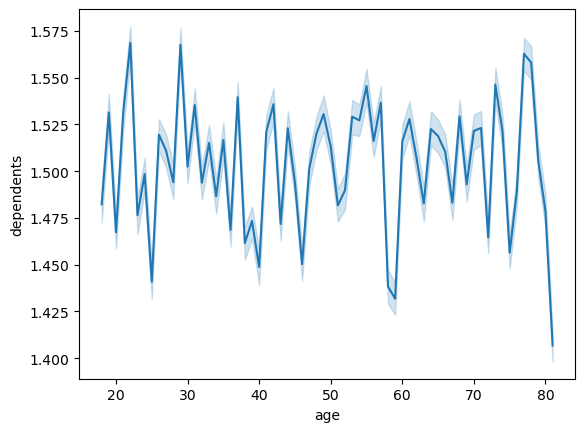

In [47]:
age_and_family_line = sns.lineplot(data = customer_age_and_family_data, x = 'age', y = 'dependents')

#### There is no clear relationship between age and number of dependents other than the number completely falling off at the end of life (80+).

### Step Seven - Customer age and spending power

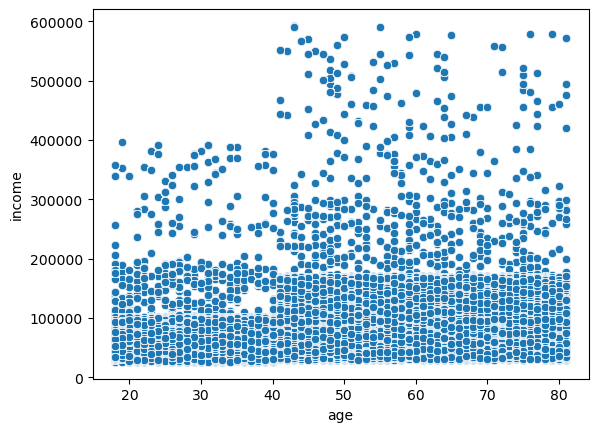

In [51]:
age_and_income_scatter = sns.scatterplot(x = 'age', y = 'income', data = small_sample)

#### Generally, most customers of all ages exist below the 200,000 dollars threshold. There are also different ages to note where incomes differentiate.

#### From age 20 - 40, 100,000 dollars or less is most common, and few customers of this age group exceed 400,000 dollars.

#### As age increases, so does income. After 40, customers are more likely to be at 200,000 dollars or less, and this is the age group that starts to exceed 400,000 dollars in income.

### Overall, income increases as age increases.

### Task Eight - export visualizations

In [52]:
#exporting into a saved file
prices_line.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'prices_by_dow_line.png'))
hour_hist.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'hour_of_day_hist.png'))
loyalty_bar.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'customer_loyalty_bar.png'))
expenditure_line.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'customer_expenditure_line.png'))
age_and_income_scatter.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'age_and_income_scatter.png'))
age_and_family_line.figure.savefig(os.path.join(mainPath, '04 Analysis', 'Visualizations', 'age_and_family_line.png'))

In [21]:
customers_orders.to_pickle(os.path.join(mainPath, '02 Datasets','Clean Data', 'customers_orders_cleaned.pkl'))

In [82]:
customers_orders.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependents,fam_status,income,...,busiest_days,price_category,busiest_period_of_day,max_order_count,loyalty_status,spending_mean,spending_status,order_frequency_median,frequency_status,big_merge
0,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy days,Mid-range product,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both
1,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy days,Mid-range product,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both
2,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy days,Mid-range product,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both
3,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy days,Low-range product,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both
4,87,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy days,Mid-range product,Average orders period,27,Regular customer status,8.8125,Low spender status,7.0,Frequent customer,both
